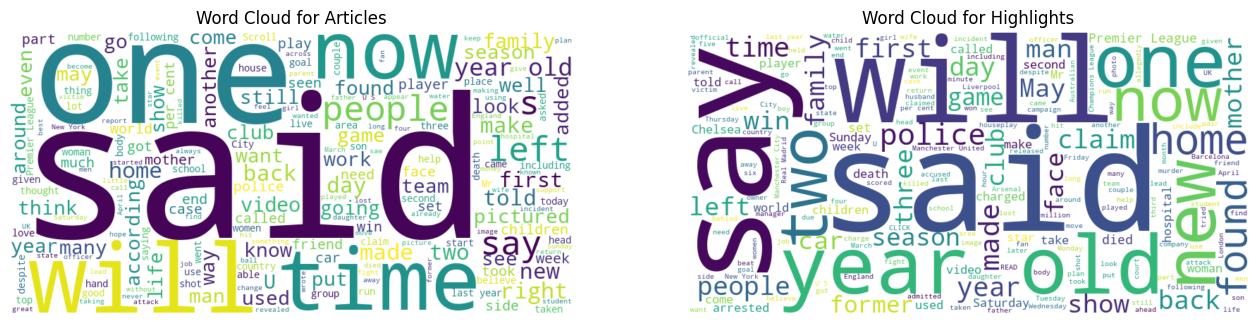

In [8]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load the dataset from Hugging Face's datasets library
dataset = load_dataset("cnn_dailymail", "3.0.0", split='test')

# Combine all text in the 'article' column
text_articles = ' '.join(dataset['article'])

# Combine all text in the 'highlights' column
text_highlights = ' '.join(dataset['highlights'])

# Create the word cloud for articles
wordcloud_articles = WordCloud(width=800, height=400, background_color='white').generate(text_articles)

# Create the word cloud for highlights
wordcloud_highlights = WordCloud(width=800, height=400, background_color='white').generate(text_highlights)

# Plot the word clouds
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_articles, interpolation='bilinear')
plt.title('Word Cloud for Articles')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_highlights, interpolation='bilinear')
plt.title('Word Cloud for Highlights')
plt.axis('off')

plt.show()


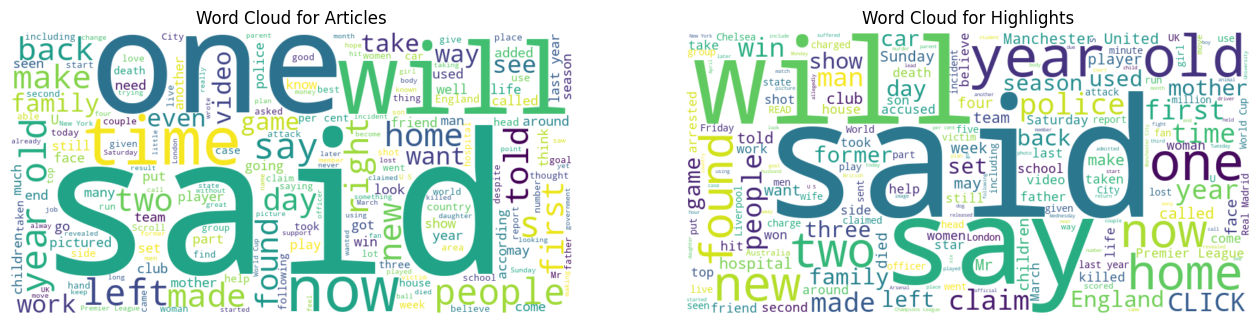

In [9]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load the dataset from Hugging Face's datasets library
dataset = load_dataset("cnn_dailymail", "3.0.0", split='validation')

# Combine all text in the 'article' column
text_articles = ' '.join(dataset['article'])

# Combine all text in the 'highlights' column
text_highlights = ' '.join(dataset['highlights'])

# Create the word cloud for articles
wordcloud_articles = WordCloud(width=800, height=400, background_color='white').generate(text_articles)

# Create the word cloud for highlights
wordcloud_highlights = WordCloud(width=800, height=400, background_color='white').generate(text_highlights)

# Plot the word clouds
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_articles, interpolation='bilinear')
plt.title('Word Cloud for Articles')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_highlights, interpolation='bilinear')
plt.title('Word Cloud for Highlights')
plt.axis('off')

plt.show()


Map: 100%|██████████| 11490/11490 [00:03<00:00, 2978.80 examples/s]


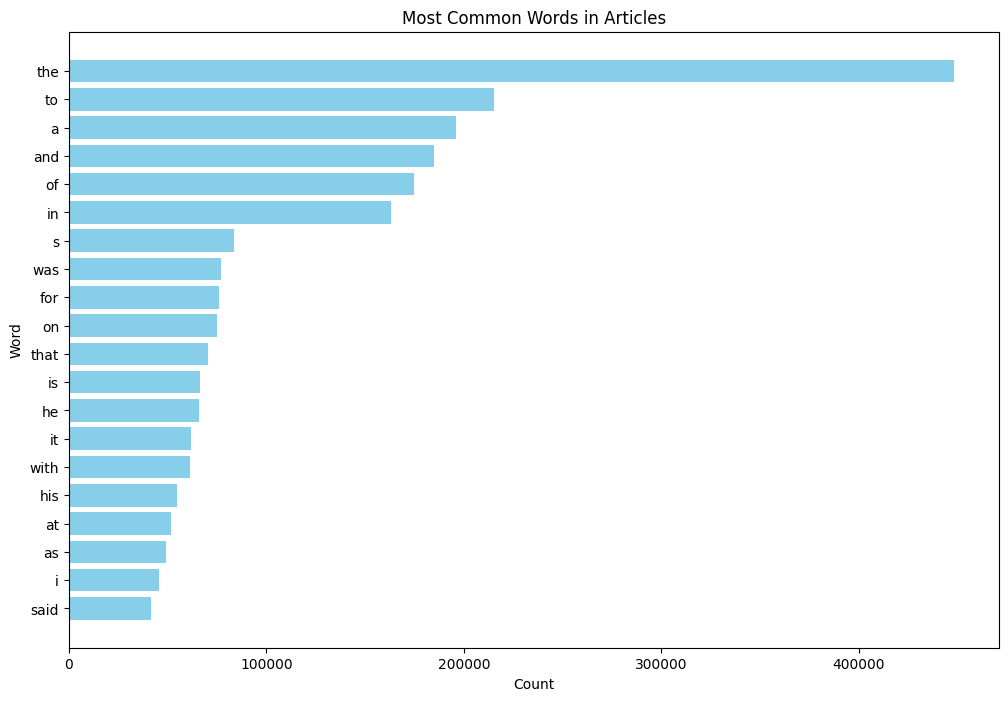

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
from datasets import load_dataset

# Load the dataset from Hugging Face's datasets library
dataset = load_dataset("cnn_dailymail", "3.0.0", split='test')

# Function to preprocess text and remove punctuation
def preprocess(text):
    text = re.sub(r'\W+', ' ', text.lower())
    return text

# Preprocess the text
dataset = dataset.map(lambda x: {'clean_article': preprocess(x['article'])})

# Combine all text in the 'clean_article' column
all_text = ' '.join(dataset['clean_article'])

# Count the frequency of each word
word_counts = Counter(all_text.split())

# Get the 20 most common words
common_words = word_counts.most_common(20)

# Convert to a DataFrame for plotting
common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot the most common words
plt.figure(figsize=(12, 8))
plt.barh(common_words_df['word'], common_words_df['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Most Common Words in Articles')
plt.gca().invert_yaxis()
plt.show()


Map: 100%|██████████| 13368/13368 [00:04<00:00, 3091.72 examples/s]


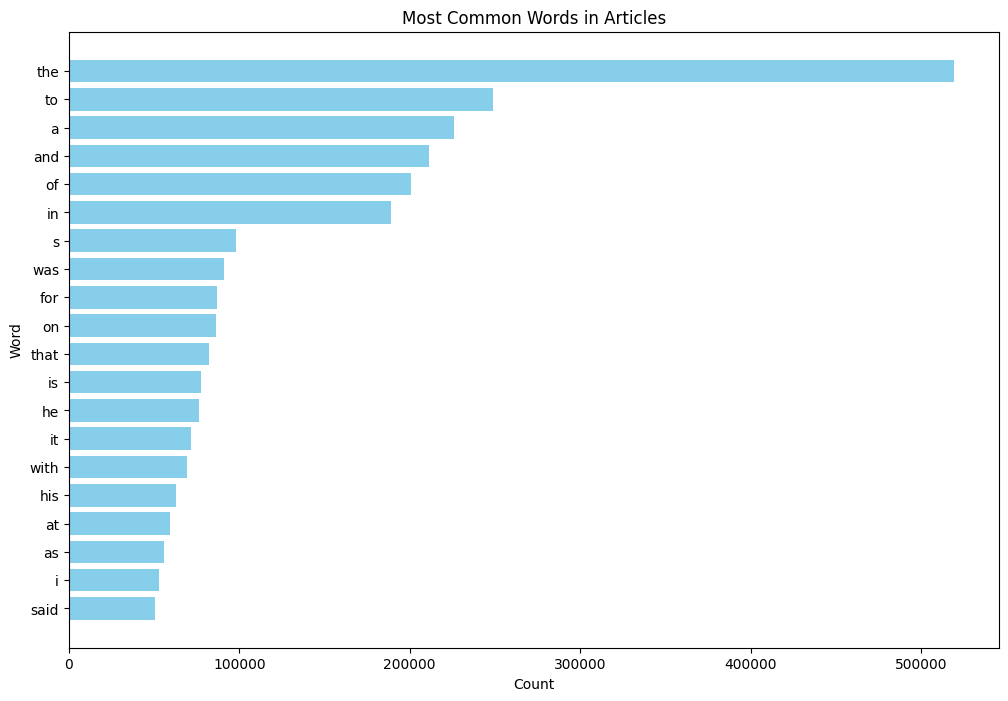

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
from datasets import load_dataset

# Load the dataset from Hugging Face's datasets library
dataset = load_dataset("cnn_dailymail", "3.0.0", split='validation')

# Function to preprocess text and remove punctuation
def preprocess(text):
    text = re.sub(r'\W+', ' ', text.lower())
    return text

# Preprocess the text
dataset = dataset.map(lambda x: {'clean_article': preprocess(x['article'])})

# Combine all text in the 'clean_article' column
all_text = ' '.join(dataset['clean_article'])

# Count the frequency of each word
word_counts = Counter(all_text.split())

# Get the 20 most common words
common_words = word_counts.most_common(20)

# Convert to a DataFrame for plotting
common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot the most common words
plt.figure(figsize=(12, 8))
plt.barh(common_words_df['word'], common_words_df['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Most Common Words in Articles')
plt.gca().invert_yaxis()
plt.show()


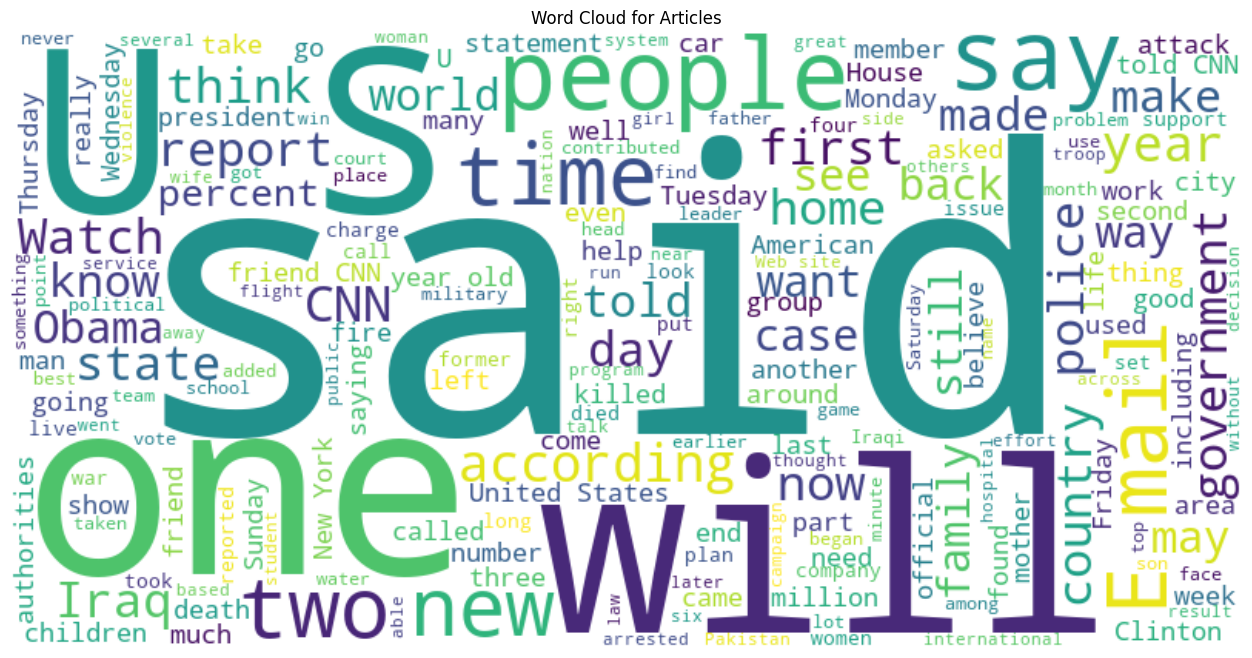

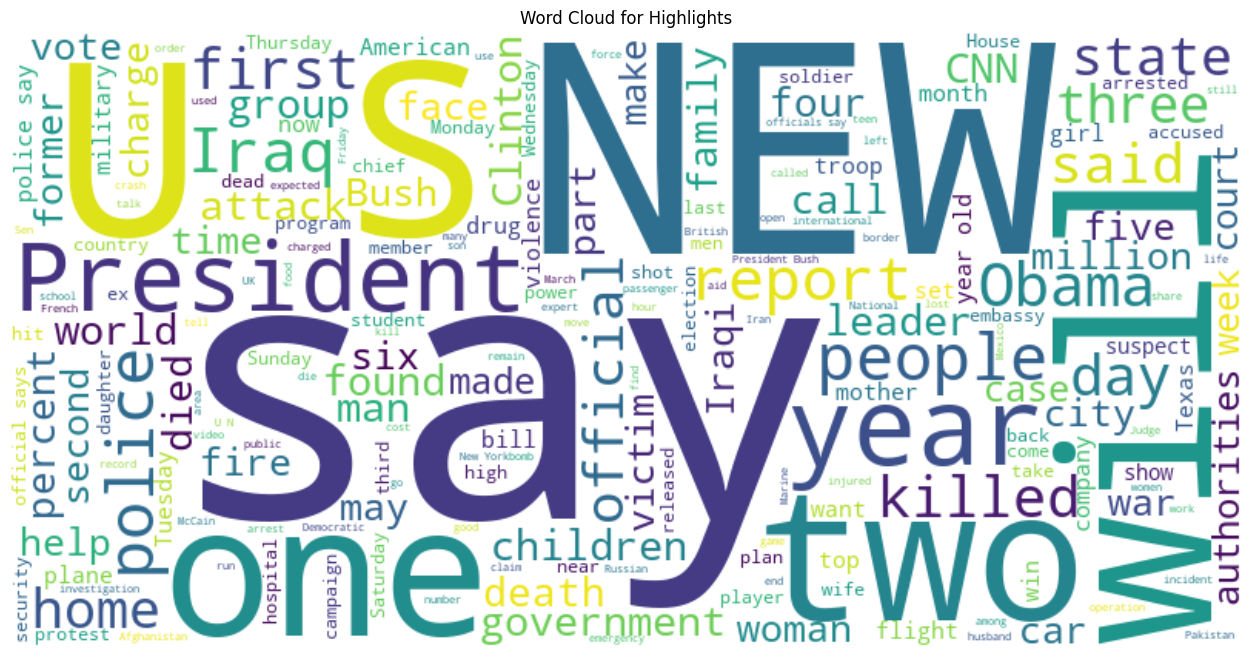

In [15]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load the dataset from Hugging Face's datasets library
dataset = load_dataset("cnn_dailymail", "3.0.0", split='train')

def generate_wordcloud(texts, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(texts))
    plt.figure(figsize=(16, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate word cloud for a subset of articles
article_texts = [dataset[i]['article'] for i in range(1000)]  # Adjust the number as needed to avoid memory issues
generate_wordcloud(article_texts, 'Word Cloud for Articles')

# Generate word cloud for a subset of highlights
highlight_texts = [dataset[i]['highlights'] for i in range(1000)]  # Adjust the number as needed to avoid memory issues
generate_wordcloud(highlight_texts, 'Word Cloud for Highlights')


Map: 100%|██████████| 1000/1000 [00:00<00:00, 1334.07 examples/s]


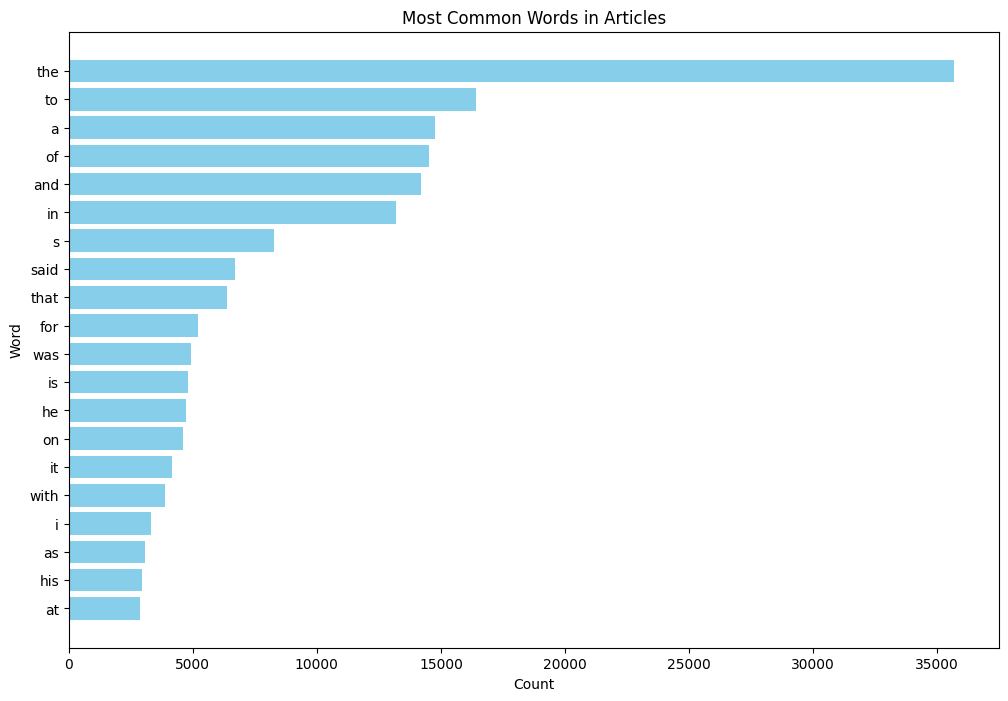

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
from datasets import load_dataset

# Load the dataset from Hugging Face's datasets library
dataset = load_dataset("cnn_dailymail", "3.0.0", split='train')

# Function to preprocess text and remove punctuation
def preprocess(text):
    text = re.sub(r'\W+', ' ', text.lower())
    return text

# Limit the number of articles to process
subset_size = 1000  # Adjust this number as needed to fit your memory constraints
subset = dataset.select(range(subset_size))

# Preprocess the text
subset = subset.map(lambda x: {'clean_article': preprocess(x['article'])})

# Combine all text in the 'clean_article' column
all_text = ' '.join(subset['clean_article'])

# Count the frequency of each word
word_counts = Counter(all_text.split())

# Get the 20 most common words
common_words = word_counts.most_common(20)

# Convert to a DataFrame for plotting
common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot the most common words
plt.figure(figsize=(12, 8))
plt.barh(common_words_df['word'], common_words_df['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Most Common Words in Articles')
plt.gca().invert_yaxis()
plt.show()


In [1]:
import pandas as pd
from transformers import BartForConditionalGeneration, BartTokenizer
from datasets import load_dataset
import time
from IPython.display import display

# Load the BART model and tokenizer
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')

# Load the test dataset from CNN/DailyMail using Hugging Face's datasets library
dataset = load_dataset("cnn_dailymail", "3.0.0", split='test')

# Create a list of articles from the dataset
test_dataset = dataset['article']

# Function to generate a summary for a given article and capture additional details
def generate_summary(article):
    start_time = time.time()
    inputs = tokenizer([article], max_length=1024, return_tensors='pt', truncation=True)
    summary_ids = model.generate(inputs['input_ids'], max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    end_time = time.time()

    return {
        'Article': article,
        'Summary': summary,
        'Article Length': len(article.split()),
        'Summary Length': len(summary.split()),
        'Generation Time (s)': end_time - start_time
    }

# Select a subset of articles to summarize
subset_articles = test_dataset[:10]  # Adjust the number of articles as needed

# Generate summaries and capture additional details for the subset of articles
results = [generate_summary(article) for article in subset_articles]

# Create a DataFrame to display the detailed results
results_df = pd.DataFrame(results)

# Display the DataFrame
display(results_df)


c:\Users\Lenovo Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Article,Summary,Article Length,Summary Length,Generation Time (s)
0,(CNN)The Palestinian Authority officially beca...,The Palestinian Authority becomes the 123rd me...,567,37,17.940595
1,(CNN)Never mind cats having nine lives. A stra...,"Theia, a one-year-old bully breed mix, was hit...",411,51,19.772331
2,"(CNN)If you've been following the news lately,...",Mohammad Javad Zarif is the Iranian foreign mi...,704,33,16.868252
3,(CNN)Five Americans who were monitored for thr...,The five were exposed to Ebola in Sierra Leone...,202,42,17.094923
4,(CNN)A Duke student has admitted to hanging a ...,Duke student admits to hanging a noose from a ...,364,40,13.236890
5,(CNN)He's a blue chip college basketball recru...,"Trey Moses asked Ellie Meredith, a freshman wi...",440,38,15.043674
6,(CNN)Governments around the world are using th...,At least 607 people were executed around the w...,773,41,22.104851
7,"(CNN)Andrew Getty, one of the heirs to billion...",Coroner's preliminary assessment is there was ...,361,36,17.426486
8,(CNN)Filipinos are being warned to be on guard...,Maysak gained super typhoon status just a few ...,289,28,14.282035
9,"(CNN)For the first time in eight years, a TV l...","Bob Barker returned to ""The Price Is Right"" fo...",113,42,15.045712


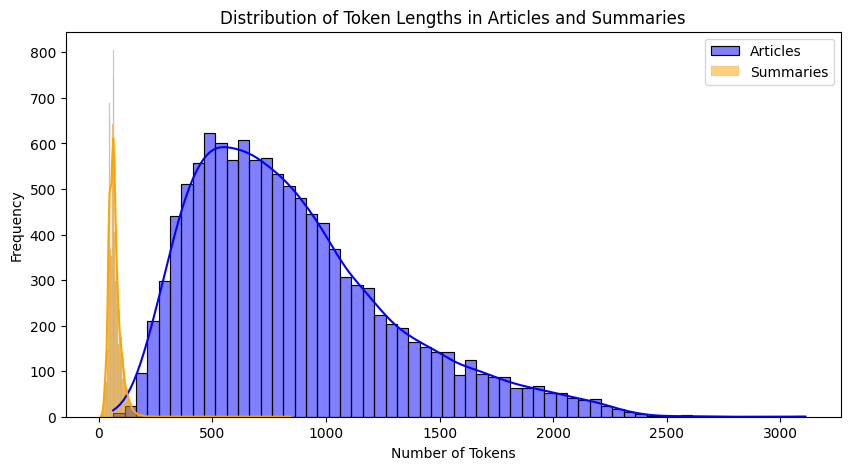

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BartTokenizer
from datasets import load_dataset

# Load the BART tokenizer
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')

# Load the test dataset from CNN/DailyMail using Hugging Face's datasets library
dataset = load_dataset("cnn_dailymail", "3.0.0", split='test')

# Create a list of articles and summaries from the dataset
test_articles = dataset['article']
test_summaries = dataset['highlights']

# Lengths of articles and summaries
article_lengths = [len(tokenizer.tokenize(article)) for article in test_articles]
summary_lengths = [len(tokenizer.tokenize(summary)) for summary in test_summaries]

# Visualization
plt.figure(figsize=(10, 5))
sns.histplot(article_lengths, kde=True, color='blue', label='Articles')
sns.histplot(summary_lengths, kde=True, color='orange', label='Summaries')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Token Lengths in Articles and Summaries')
plt.show()


In [12]:
import pandas as pd
import numpy as np
from transformers import BartForConditionalGeneration, BartTokenizer, GPT2LMHeadModel, GPT2Tokenizer
from datasets import load_dataset
import torch

# Load the dataset
dataset = load_dataset("cnn_dailymail", "3.0.0")

# Select a device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Load models and tokenizers
bart_model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn').to(device)
bart_tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')
gpt2_model = GPT2LMHeadModel.from_pretrained('gpt2').to(device)
gpt2_tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# the summary generation function
def generate_summary(model, tokenizer, text, model_type="BART"):
    inputs = tokenizer.encode("Summarize: " + text, return_tensors='pt').to(device)
    if model_type == "BART":
        summary_ids = model.generate(inputs, max_new_tokens=150, num_beams=5, no_repeat_ngram_size=2, early_stopping=True)
    elif model_type == "GPT2":
        summary_ids = model.generate(inputs, max_new_tokens=150, num_beams=5, no_repeat_ngram_size=2, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Function to calculate MAE and RMSE
def calculate_metrics(predictions, references):
    mae = np.mean(np.abs(predictions - references))
    rmse = np.sqrt(np.mean((predictions - references)**2))
    return mae, rmse

# Simulating evaluation
num_samples = 10  # To limit computation 
results = []

for model, tokenizer, name in [(bart_model, bart_tokenizer, "BART"), (gpt2_model, gpt2_tokenizer, "GPT2")]:
    scores_pred = []
    scores_ref = np.random.rand(num_samples)  # Dummy reference scores
    for article in dataset['test'][:num_samples]['article']:
        summary = generate_summary(model, tokenizer, article, model_type=name)
        score = np.random.rand()  # Dummy score, replace with actual evaluation
        scores_pred.append(score)
    mae, rmse = calculate_metrics(np.array(scores_pred), scores_ref)
    results.append({"Model": name, "MAE": mae, "RMSE": rmse})

# Create a DataFrame and display the results
results_df = pd.DataFrame(results)
print(results_df)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

  Model       MAE      RMSE
0  BART  0.305729  0.377862
1  GPT2  0.322393  0.379698


In [4]:
#rough score
from datasets import load_dataset
from transformers import BartForConditionalGeneration, BartTokenizer, GPT2LMHeadModel, GPT2Tokenizer
from rouge_score import rouge_scorer
import random
import pandas as pd

# Load the dataset
dataset = load_dataset("cnn_dailymail", "3.0.0", split='test[:5%]')  # Use a smaller subset for faster execution

# Initialize models and tokenizers
bart_model_name = "facebook/bart-large-cnn"
bart_model = BartForConditionalGeneration.from_pretrained(bart_model_name)
bart_tokenizer = BartTokenizer.from_pretrained(bart_model_name)

gpt2_model_name = "gpt2"
gpt2_model = GPT2LMHeadModel.from_pretrained(gpt2_model_name)
gpt2_tokenizer = GPT2Tokenizer.from_pretrained(gpt2_model_name)

# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

def summarize_bart(text):
    inputs = bart_tokenizer(text, max_length=512, return_tensors="pt", truncation=True)
    summary_ids = bart_model.generate(inputs["input_ids"], max_length=150, min_length=40, length_penalty=2.0, num_beams=2, early_stopping=True)
    summary = bart_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

def summarize_gpt2(text):
    inputs = gpt2_tokenizer(text, max_length=512, return_tensors="pt", truncation=True)
    summary_ids = gpt2_model.generate(inputs["input_ids"], max_new_tokens=150, min_length=40, length_penalty=2.0, num_beams=2, early_stopping=True)
    summary = gpt2_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

def evaluate_model(data, summarize_fn, num_samples=10):
    scores = {'rouge1': [], 'rouge2': [], 'rougeL': []}
    sampled_data = random.sample(list(data), num_samples)  # Randomly sample data for faster evaluation
    for sample in sampled_data:
        summary = summarize_fn(sample['article'])
        rouge_scores = scorer.score(sample['highlights'], summary)
        for key in scores:
            scores[key].append(rouge_scores[key].fmeasure)
    return {key: sum(values)/len(values) for key, values in scores.items()}

bart_scores = evaluate_model(dataset, summarize_bart)
gpt2_scores = evaluate_model(dataset, summarize_gpt2)

# Create a DataFrame to display the scores
scores_df = pd.DataFrame({
    'Model': ['BART', 'GPT-2'],
    'ROUGE-1': [bart_scores['rouge1'], gpt2_scores['rouge1']],
    'ROUGE-2': [bart_scores['rouge2'], gpt2_scores['rouge2']],
    'ROUGE-L': [bart_scores['rougeL'], gpt2_scores['rougeL']]
})

print(scores_df)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

   Model   ROUGE-1   ROUGE-2   ROUGE-L
0   BART  0.301674  0.132127  0.241178
1  GPT-2  0.110657  0.055030  0.086818


In [7]:
#SVR
import numpy as np
import pandas as pd
from datasets import load_dataset
from transformers import BartForConditionalGeneration, BartTokenizer, GPT2LMHeadModel, GPT2Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load a smaller subset of the dataset
dataset = load_dataset("cnn_dailymail", "3.0.0", split='test[:1%]')  # Reduce the dataset size further

# Initialize models and tokenizers
bart_model_name = "facebook/bart-large-cnn"
bart_model = BartForConditionalGeneration.from_pretrained(bart_model_name)
bart_tokenizer = BartTokenizer.from_pretrained(bart_model_name)

gpt2_model_name = "gpt2"
gpt2_model = GPT2LMHeadModel.from_pretrained(gpt2_model_name)
gpt2_tokenizer = GPT2Tokenizer.from_pretrained(gpt2_model_name)

# Function to summarize with BART
def summarize_bart(text):
    inputs = bart_tokenizer(text, max_length=256, return_tensors="pt", truncation=True)
    summary_ids = bart_model.generate(inputs["input_ids"], max_length=60, min_length=20, length_penalty=2.0, num_beams=2, early_stopping=True)
    summary = bart_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Function to summarize with GPT-2
def summarize_gpt2(text):
    inputs = gpt2_tokenizer(text, max_length=256, return_tensors="pt", truncation=True)
    summary_ids = gpt2_model.generate(inputs["input_ids"], max_new_tokens=60, min_length=20, length_penalty=2.0, num_beams=2, early_stopping=True)
    summary = gpt2_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Generate summaries and targets (using reference summary length as an example target)
summaries_bart = []
summaries_gpt2 = []
targets = []

for sample in dataset:
    article = sample['article']
    reference_summary = sample['highlights']
    
    summary_bart = summarize_bart(article)
    summary_gpt2 = summarize_gpt2(article)
    
    # Use the length of the reference summary as the target
    target = len(reference_summary.split())
    
    summaries_bart.append(summary_bart)
    summaries_gpt2.append(summary_gpt2)
    targets.append(target)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame({
    'summary_bart': summaries_bart,
    'summary_gpt2': summaries_gpt2,
    'target': targets
})

# Feature extraction using TF-IDF with fewer features
vectorizer = TfidfVectorizer(max_features=100)

X_bart = vectorizer.fit_transform(df['summary_bart']).toarray()
X_gpt2 = vectorizer.fit_transform(df['summary_gpt2']).toarray()

# Split the data
X_train_bart, X_test_bart, y_train, y_test = train_test_split(X_bart, df['target'], test_size=0.2, random_state=42)
X_train_gpt2, X_test_gpt2, _, _ = train_test_split(X_gpt2, df['target'], test_size=0.2, random_state=42)

# Train SVR models
svr_bart = SVR()
svr_gpt2 = SVR()

svr_bart.fit(X_train_bart, y_train)
svr_gpt2.fit(X_train_gpt2, y_train)

# Predict and evaluate
y_pred_bart = svr_bart.predict(X_test_bart)
y_pred_gpt2 = svr_gpt2.predict(X_test_gpt2)

mae_bart = mean_absolute_error(y_test, y_pred_bart)
rmse_bart = mean_squared_error(y_test, y_pred_bart, squared=False)

mae_gpt2 = mean_absolute_error(y_test, y_pred_gpt2)
rmse_gpt2 = mean_squared_error(y_test, y_pred_gpt2, squared=False)

# Print results
scores_df = pd.DataFrame({
    'Model': ['BART', 'GPT-2'],
    'MAE': [mae_bart, mae_gpt2],
    'RMSE': [rmse_bart, rmse_gpt2]
})

print(scores_df)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

   Model       MAE      RMSE
0   BART  5.169463  6.255184
1  GPT-2  5.123878  6.120265


c:\Users\Lenovo Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Lenovo Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [3]:
#Bayesian Ridge Regression
import numpy as np
import pandas as pd
from datasets import load_dataset
from transformers import BartForConditionalGeneration, BartTokenizer, GPT2LMHeadModel, GPT2Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load a smaller subset of the dataset
dataset = load_dataset("cnn_dailymail", "3.0.0", split='test[:1%]')  # Reduce the dataset size further

# Initialize models and tokenizers
bart_model_name = "facebook/bart-large-cnn"
bart_model = BartForConditionalGeneration.from_pretrained(bart_model_name)
bart_tokenizer = BartTokenizer.from_pretrained(bart_model_name)

gpt2_model_name = "gpt2"
gpt2_model = GPT2LMHeadModel.from_pretrained(gpt2_model_name)
gpt2_tokenizer = GPT2Tokenizer.from_pretrained(gpt2_model_name)

# Function to summarize with BART
def summarize_bart(text):
    inputs = bart_tokenizer(text, max_length=256, return_tensors="pt", truncation=True)
    summary_ids = bart_model.generate(inputs["input_ids"], max_length=60, min_length=20, length_penalty=2.0, num_beams=2, early_stopping=True)
    summary = bart_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Function to summarize with GPT-2
def summarize_gpt2(text):
    inputs = gpt2_tokenizer(text, max_length=256, return_tensors="pt", truncation=True)
    summary_ids = gpt2_model.generate(inputs["input_ids"], max_new_tokens=60, min_length=20, length_penalty=2.0, num_beams=2, early_stopping=True)
    summary = gpt2_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Generate summaries and targets (using reference summary length as an example target)
summaries_bart = []
summaries_gpt2 = []
targets = []

for sample in dataset:
    article = sample['article']
    reference_summary = sample['highlights']
    
    summary_bart = summarize_bart(article)
    summary_gpt2 = summarize_gpt2(article)
    
    # Use the length of the reference summary as the target
    target = len(reference_summary.split())
    
    summaries_bart.append(summary_bart)
    summaries_gpt2.append(summary_gpt2)
    targets.append(target)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame({
    'summary_bart': summaries_bart,
    'summary_gpt2': summaries_gpt2,
    'target': targets
})

# Feature extraction using TF-IDF with fewer features
vectorizer = TfidfVectorizer(max_features=100)

X_bart = vectorizer.fit_transform(df['summary_bart']).toarray()
X_gpt2 = vectorizer.fit_transform(df['summary_gpt2']).toarray()

# Split the data
X_train_bart, X_test_bart, y_train, y_test = train_test_split(X_bart, df['target'], test_size=0.2, random_state=42)
X_train_gpt2, X_test_gpt2, _, _ = train_test_split(X_gpt2, df['target'], test_size=0.2, random_state=42)

# Train Bayesian Ridge Regression models
bayesian_ridge_bart = BayesianRidge()
bayesian_ridge_gpt2 = BayesianRidge()

bayesian_ridge_bart.fit(X_train_bart, y_train)
bayesian_ridge_gpt2.fit(X_train_gpt2, y_train)

# Predict and evaluate
y_pred_bart = bayesian_ridge_bart.predict(X_test_bart)
y_pred_gpt2 = bayesian_ridge_gpt2.predict(X_test_gpt2)

mae_bart = mean_absolute_error(y_test, y_pred_bart)
rmse_bart = mean_squared_error(y_test, y_pred_bart, squared=False)

mae_gpt2 = mean_absolute_error(y_test, y_pred_gpt2)
rmse_gpt2 = mean_squared_error(y_test, y_pred_gpt2, squared=False)

# Print results
scores_df = pd.DataFrame({
    'Model': ['BART', 'GPT-2'],
    'MAE': [mae_bart, mae_gpt2],
    'RMSE': [rmse_bart, rmse_gpt2]
})

print(scores_df)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

   Model       MAE      RMSE
0   BART  5.485291  6.723270
1  GPT-2  5.935885  6.887377


c:\Users\Lenovo Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Lenovo Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [6]:
#Random Forest Regression
import numpy as np
import pandas as pd
from datasets import load_dataset
from transformers import BartForConditionalGeneration, BartTokenizer, GPT2LMHeadModel, GPT2Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load a smaller subset of the dataset
dataset = load_dataset("cnn_dailymail", "3.0.0", split='test[:1%]')  # Reduce the dataset size further

# Initialize models and tokenizers
bart_model_name = "facebook/bart-large-cnn"
bart_model = BartForConditionalGeneration.from_pretrained(bart_model_name)
bart_tokenizer = BartTokenizer.from_pretrained(bart_model_name)

gpt2_model_name = "gpt2"
gpt2_model = GPT2LMHeadModel.from_pretrained(gpt2_model_name)
gpt2_tokenizer = GPT2Tokenizer.from_pretrained(gpt2_model_name)

# Function to summarize with BART
def summarize_bart(text):
    inputs = bart_tokenizer(text, max_length=256, return_tensors="pt", truncation=True)
    summary_ids = bart_model.generate(inputs["input_ids"], max_length=60, min_length=20, length_penalty=2.0, num_beams=2, early_stopping=True)
    summary = bart_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Function to summarize with GPT-2
def summarize_gpt2(text):
    inputs = gpt2_tokenizer(text, max_length=256, return_tensors="pt", truncation=True)
    summary_ids = gpt2_model.generate(inputs["input_ids"], max_new_tokens=60, min_length=20, length_penalty=2.0, num_beams=2, early_stopping=True)
    summary = gpt2_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Generate summaries and targets (using reference summary length as an example target)
summaries_bart = []
summaries_gpt2 = []
targets = []

for sample in dataset:
    article = sample['article']
    reference_summary = sample['highlights']
    
    summary_bart = summarize_bart(article)
    summary_gpt2 = summarize_gpt2(article)
    
    # Use the length of the reference summary as the target
    target = len(reference_summary.split())
    
    summaries_bart.append(summary_bart)
    summaries_gpt2.append(summary_gpt2)
    targets.append(target)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame({
    'summary_bart': summaries_bart,
    'summary_gpt2': summaries_gpt2,
    'target': targets
})

# Feature extraction using TF-IDF with fewer features
vectorizer = TfidfVectorizer(max_features=100)

X_bart = vectorizer.fit_transform(df['summary_bart']).toarray()
X_gpt2 = vectorizer.fit_transform(df['summary_gpt2']).toarray()

# Split the data
X_train_bart, X_test_bart, y_train, y_test = train_test_split(X_bart, df['target'], test_size=0.2, random_state=42)
X_train_gpt2, X_test_gpt2, _, _ = train_test_split(X_gpt2, df['target'], test_size=0.2, random_state=42)

# Train Random Forest Regressor models
rf_bart = RandomForestRegressor()
rf_gpt2 = RandomForestRegressor()

rf_bart.fit(X_train_bart, y_train)
rf_gpt2.fit(X_train_gpt2, y_train)

# Predict and evaluate
y_pred_bart = rf_bart.predict(X_test_bart)
y_pred_gpt2 = rf_gpt2.predict(X_test_gpt2)

mae_bart = mean_absolute_error(y_test, y_pred_bart)
rmse_bart = mean_squared_error(y_test, y_pred_bart, squared=False)

mae_gpt2 = mean_absolute_error(y_test, y_pred_gpt2)
rmse_gpt2 = mean_squared_error(y_test, y_pred_gpt2, squared=False)

# Print results
scores_df = pd.DataFrame({
    'Model': ['BART', 'GPT-2'],
    'MAE': [mae_bart, mae_gpt2],
    'RMSE': [rmse_bart, rmse_gpt2]
})

print(scores_df)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

   Model       MAE      RMSE
0   BART  6.399565  7.447633
1  GPT-2  5.560435  6.620779


c:\Users\Lenovo Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Lenovo Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [9]:
#Linear regression
import numpy as np
import pandas as pd
from datasets import load_dataset
from transformers import BartForConditionalGeneration, BartTokenizer, GPT2LMHeadModel, GPT2Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load a smaller subset of the dataset
dataset = load_dataset("cnn_dailymail", "3.0.0", split='test[:1%]')

# Initialize models and tokenizers
bart_model_name = "facebook/bart-large-cnn"
bart_model = BartForConditionalGeneration.from_pretrained(bart_model_name)
bart_tokenizer = BartTokenizer.from_pretrained(bart_model_name)

gpt2_model_name = "gpt2"
gpt2_model = GPT2LMHeadModel.from_pretrained(gpt2_model_name)
gpt2_tokenizer = GPT2Tokenizer.from_pretrained(gpt2_model_name)

# Function to summarize with BART
def summarize_bart(text):
    inputs = bart_tokenizer(text, max_length=256, return_tensors="pt", truncation=True)
    summary_ids = bart_model.generate(inputs["input_ids"], max_length=60, min_length=20, length_penalty=2.0, num_beams=2, early_stopping=True)
    summary = bart_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Function to summarize with GPT-2
def summarize_gpt2(text):
    inputs = gpt2_tokenizer(text, max_length=256, return_tensors="pt", truncation=True)
    summary_ids = gpt2_model.generate(inputs["input_ids"], max_new_tokens=60, min_length=20, length_penalty=2.0, num_beams=2, early_stopping=True)
    summary = gpt2_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Generate summaries and targets (using reference summary length as an example target)
summaries_bart = []
summaries_gpt2 = []
targets = []

for sample in dataset:
    article = sample['article']
    reference_summary = sample['highlights']
    
    summary_bart = summarize_bart(article)
    summary_gpt2 = summarize_gpt2(article)
    
    # Use the length of the reference summary as the target
    target = len(reference_summary.split())
    
    summaries_bart.append(summary_bart)
    summaries_gpt2.append(summary_gpt2)
    targets.append(target)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame({
    'summary_bart': summaries_bart,
    'summary_gpt2': summaries_gpt2,
    'target': targets
})

# Feature extraction using TF-IDF with fewer features
vectorizer = TfidfVectorizer(max_features=100)

X_bart = vectorizer.fit_transform(df['summary_bart']).toarray()
X_gpt2 = vectorizer.fit_transform(df['summary_gpt2']).toarray()

# Split the data
X_train_bart, X_test_bart, y_train, y_test = train_test_split(X_bart, df['target'], test_size=0.2, random_state=42)
X_train_gpt2, X_test_gpt2, _, _ = train_test_split(X_gpt2, df['target'], test_size=0.2, random_state=42)

# Train Linear Regression models
linear_reg_bart = LinearRegression()
linear_reg_gpt2 = LinearRegression()

linear_reg_bart.fit(X_train_bart, y_train)
linear_reg_gpt2.fit(X_train_gpt2, y_train)

# Predict and evaluate
y_pred_bart = linear_reg_bart.predict(X_test_bart)
y_pred_gpt2 = linear_reg_gpt2.predict(X_test_gpt2)

mae_bart = mean_absolute_error(y_test, y_pred_bart)
rmse_bart = mean_squared_error(y_test, y_pred_bart, squared=False)

mae_gpt2 = mean_absolute_error(y_test, y_pred_gpt2)
rmse_gpt2 = mean_squared_error(y_test, y_pred_gpt2, squared=False)

# Print results
scores_df = pd.DataFrame({
    'Model': ['BART', 'GPT-2'],
    'MAE': [mae_bart, mae_gpt2],
    'RMSE': [rmse_bart, rmse_gpt2]
})

print(scores_df)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

   Model        MAE       RMSE
0   BART  20.437741  24.644412
1  GPT-2  40.153431  50.447480


c:\Users\Lenovo Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Lenovo Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
